In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely

In [2]:
df =  pd.read_csv('gas_grid.csv')

C:\Users\dapangxing\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (20,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,...,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,lat,long,lonlat,geometry,FID
0,0,1050242,E12,31236,Gas Leak (Natural and LP Gases),4/14/00,4/14/00,4/14/00 16:58,4/14/00 16:59,4/14/00 17:01,...,5,7,Inner Sunset,"(37.7633165969878, -122.458205988587)",001050242-E12,37.763317,-122.458206,"(-122.458205988587, 37.7633165969878)",POINT (-122.458205988587 37.7633165969878),286.0
1,1,1050319,E44,31311,Gas Leak (Natural and LP Gases),4/14/00,4/14/00,4/14/00 20:34,4/14/00 20:34,4/14/00 20:35,...,9,10,Visitacion Valley,"(37.7096032041108, -122.409888540797)",001050319-E44,37.709603,-122.409889,"(-122.409888540797, 37.7096032041108)",POINT (-122.409888540797 37.7096032041108),551.0
2,2,1070275,E17,31946,Gas Leak (Natural and LP Gases),4/16/00,4/16/00,4/16/00 20:38,4/16/00 20:39,4/16/00 20:39,...,10,10,Bayview Hunters Point,"(37.7291935618432, -122.374002352858)",001070275-E17,37.729194,-122.374002,"(-122.374002352858, 37.7291935618432)",POINT (-122.374002352858 37.7291935618432),731.0
3,3,1080336,E17,32305,Gas Leak (Natural and LP Gases),4/17/00,4/17/00,4/17/00 22:08,4/17/00 22:09,4/17/00 22:09,...,10,10,Bayview Hunters Point,"(37.7262373966555, -122.393902508468)",001080336-E17,37.726237,-122.393903,"(-122.393902508468, 37.7262373966555)",POINT (-122.393902508468 37.7262373966555),616.0
4,4,1090191,E40,32517,Gas Leak (Natural and LP Gases),4/18/00,4/18/00,4/18/00 16:44,4/18/00 16:45,4/18/00 16:46,...,8,4,Sunset/Parkside,"(37.7617311116621, -122.47754025709)",001090191-E40,37.761731,-122.477540,"(-122.47754025709, 37.7617311116621)",POINT (-122.47754025709 37.7617311116621),194.0


In [4]:
df.shape

(17312, 40)

In [5]:
df['datetime'] = pd.to_datetime(df['Received DtTm'])

In [6]:
df['year'] = df['datetime'].dt.year
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['week'] = df['datetime'].dt.weekday

In [7]:
df['month3'] = df['year']+1.0*df['month']/12
df['month3'] = df['month3'].apply(lambda x: round(x, 3))

In [8]:
df['Lat'] = df.Location.apply(lambda x: float(x.strip( '()' ).split(",")[0]))
df['Lon'] = df.Location.apply(lambda x: float(x.strip( '()' ).split(",")[1]))

In [9]:
df = df[['Call Number','Incident Number','datetime','year','hour','day','month','month3','week','Lat','Lon','FID']]

In [10]:
df.head()

,Call Number,Incident Number,datetime,year,hour,day,month,month3,week,Lat,Lon,FID
0,1050242,31236,2000-04-14 16:58:00,2000,16,14,4,2000.333,4,37.763317,-122.458206,286.0
1,1050319,31311,2000-04-14 20:34:00,2000,20,14,4,2000.333,4,37.709603,-122.409889,551.0
2,1070275,31946,2000-04-16 20:38:00,2000,20,16,4,2000.333,6,37.729194,-122.374002,731.0
3,1080336,32305,2000-04-17 22:08:00,2000,22,17,4,2000.333,0,37.726237,-122.393903,616.0
4,1090191,32517,2000-04-18 16:44:00,2000,16,18,4,2000.333,1,37.761731,-122.477540,194.0


In [11]:
df.shape

(17312, 12)

In [12]:
df = df[~((df['Lat'] > 37.807070) & (df['Lon'] > -122.379489))]
df.shape

(17153, 12)

In [13]:
df['Incident Number'].unique().shape
df = df.drop_duplicates('Incident Number')
df.reset_index(inplace=True, drop=True) 
df.head()

,Call Number,Incident Number,datetime,year,hour,day,month,month3,week,Lat,Lon,FID
0,1050242,31236,2000-04-14 16:58:00,2000,16,14,4,2000.333,4,37.763317,-122.458206,286.0
1,1050319,31311,2000-04-14 20:34:00,2000,20,14,4,2000.333,4,37.709603,-122.409889,551.0
2,1070275,31946,2000-04-16 20:38:00,2000,20,16,4,2000.333,6,37.729194,-122.374002,731.0
3,1080336,32305,2000-04-17 22:08:00,2000,22,17,4,2000.333,0,37.726237,-122.393903,616.0
4,1090191,32517,2000-04-18 16:44:00,2000,16,18,4,2000.333,1,37.761731,-122.477540,194.0


In [14]:
df = df[~(df['FID'].isnull())]

In [15]:
df['FID'] = df['FID'].astype(int)

In [16]:
df['Row'] = df['FID']%23 +1
df['Col'] = df['FID']/23 +1 
df['Col'] = df['Col'].apply(lambda x: int(x))

In [17]:
df.shape

(8521, 14)

In [18]:
df.reset_index(inplace=True, drop=True) 
df.head()

,Call Number,Incident Number,datetime,year,hour,day,month,month3,week,Lat,Lon,FID,Row,Col
0,1050242,31236,2000-04-14 16:58:00,2000,16,14,4,2000.333,4,37.763317,-122.458206,286,11,13
1,1050319,31311,2000-04-14 20:34:00,2000,20,14,4,2000.333,4,37.709603,-122.409889,551,23,24
2,1070275,31946,2000-04-16 20:38:00,2000,20,16,4,2000.333,6,37.729194,-122.374002,731,19,32
3,1080336,32305,2000-04-17 22:08:00,2000,22,17,4,2000.333,0,37.726237,-122.393903,616,19,27
4,1090191,32517,2000-04-18 16:44:00,2000,16,18,4,2000.333,1,37.761731,-122.477540,194,11,9


In [19]:
prshp = gpd.GeoDataFrame.from_file('g/g.shp')

In [20]:
prshp.head()

,FID,geometry
0,0,"POLYGON ((-122.51364836 37.811165, -122.509148..."
1,1,"POLYGON ((-122.51364836 37.806665, -122.509148..."
2,2,"POLYGON ((-122.51364836 37.802165, -122.509148..."
3,3,"POLYGON ((-122.51364836 37.797665, -122.509148..."
4,4,"POLYGON ((-122.51364836 37.793165, -122.509148..."


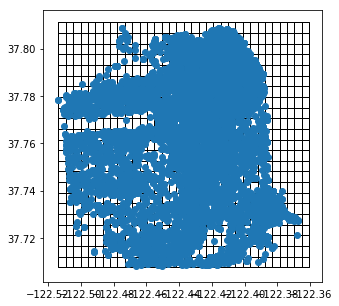

In [21]:
df['lonlat'] = list(zip(df.Lon,df.Lat))
df['geometry'] = df.lonlat.apply(lambda x:shapely.geometry.Point(x))
# convert to geopands geodataframe and export to shapefiles
gdf = gpd.GeoDataFrame(df, geometry='geometry')
plt.figure(figsize=(5, 5))
ax = plt.subplot(111)
prshp.plot(ax=ax, color='white', linewidth=1, edgecolor='black',)
gdf.plot(ax=ax)
plt.show()

In [22]:
df_2 = df.groupby(['Row','Col']).size().reset_index()
df_2.columns = ['Row','Col','NumEvents']

In [23]:
from sklearn.model_selection import train_test_split
y=df_2.loc[:,"NumEvents"]

# Get the feature space.  We are using only features from before the stop, getting rid of features from during/after the stop like "arrested".
X=df_2.loc[:,"Row":"Col"]

# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
print X_train.head()

     Row  Col
384   17   11
328   15   13
30     3   17
117    7   18
252   12   20


In [24]:
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel
np.random.seed(1)
length_scale = (1., 1.)
kernel = 1.* RBF(length_scale, length_scale_bounds=(1e-3, 1e3)) \
    + WhiteKernel(noise_level=1., noise_level_bounds=(1e-10, 1e10))

gpc_rbf = GaussianProcessRegressor(kernel=kernel,random_state=1)

# Fit to data using Maximum Likelihood Estimation of the parameters
gpc_rbf.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=[1, 1]) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=1)

In [25]:
print gpc_rbf.log_marginal_likelihood_value_
print gpc_rbf.kernel_

-2068.80839975
14.4**2 * RBF(length_scale=[1.89, 2.38]) + WhiteKernel(noise_level=66.2)


In [26]:
y_mesh_2_pred, y_mesh_2_std = gpc_rbf.predict(X, return_std=True)
y_pred = np.rint(y_mesh_2_pred)

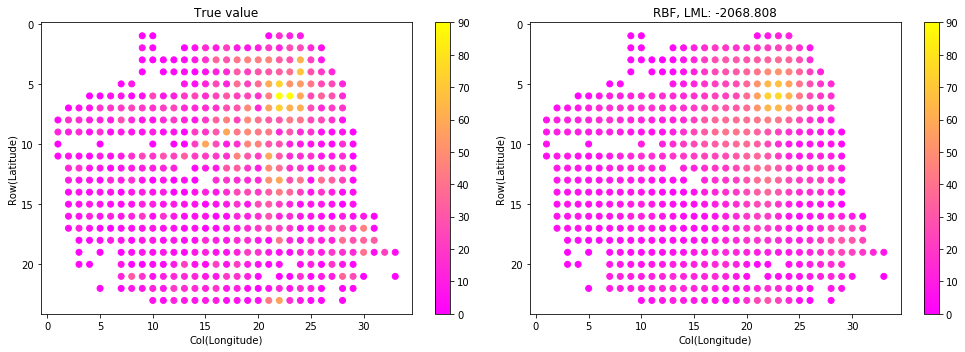

In [27]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 1], X.iloc[:, 0], c=y,cmap = 'spring',vmin = 0, vmax = 90)
plt.xlabel('Col(Longitude)')
plt.ylabel('Row(Latitude)')
plt.title("True value")
plt.gca().invert_yaxis()
plt.colorbar()
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 1], X.iloc[:, 0], c=y_pred,cmap = 'spring',vmin = 0, vmax = 90)
plt.xlabel('Col(Longitude)')
plt.ylabel('Row(Latitude)')
plt.title("%s, LML: %.3f" %
          ("RBF", gpc_rbf.log_marginal_likelihood(gpc_rbf.kernel_.theta)))
plt.gca().invert_yaxis()
plt.colorbar()
plt.tight_layout()
plt.show()

In [28]:
h = .2  # step size in the mesh
x_min, x_max = X.iloc[:, 0].min() - 0.2, X.iloc[:, 0].max() + 0.2
y_min, y_max = X.iloc[:, 1].min() - 0.2, X.iloc[:, 1].max() + 0.2

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

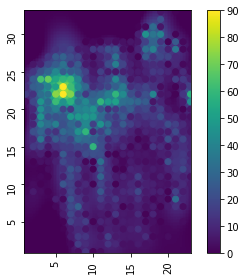

In [29]:
plt.figure(figsize=(5, 4))
# f = plt.figure()
ax = plt.subplot(111)
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
# plt.subplot(1, 1, 1)
# y_mesh_pred, sigma = gp.predict(x_mesh, return_std=True)
Z, sigma = gpc_rbf.predict(np.c_[xx.ravel(), yy.ravel()], return_std=True)
Z = Z.reshape((xx.shape[0], xx.shape[1]))


myplt = plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower",vmin = 0, vmax = 90)


plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y,vmin = 0, vmax = 90)

# plt.xlabel('Row')
# plt.ylabel('col')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.title("%s, LML: %.3f" %
#           ("RBF", gpc_rbf.log_marginal_likelihood(gpc_rbf.kernel_.theta)))

#ax.yaxis.tick_right()

plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.colorbar()
plt.tight_layout()
plt.show()

In [30]:
df_3 = df.groupby(['month3']).size().reset_index()
df_3.columns = ['month','NumEvents']

In [31]:
df_3 = df_3[0:216]

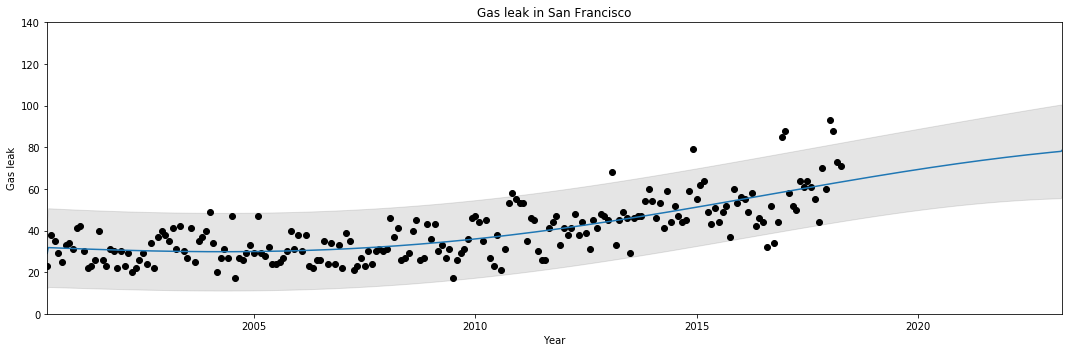

0.0701**2 * RBF(length_scale=73.2) + 4.73**2 * RBF(length_scale=15.4) * ExpSineSquared(length_scale=1e-05, periodicity=1) + 27.4**2 * RationalQuadratic(alpha=1e+05, length_scale=12.2) + 0.00479**2 * RBF(length_scale=1e-05) + WhiteKernel(noise_level=65.5)
-779.946758157


In [32]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared

X = np.asarray(df_3.month).reshape(-1,1)
y = np.asarray(df_3.NumEvents)

# Kernel with optimized parameters
k1 = 100 * RBF(length_scale=100.0)  # long term smooth rising trend
k2 = 100 * RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=100.0, periodicity=1.0, periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 100 * RationalQuadratic(length_scale=10.0)
k4 = 100 * RBF(length_scale=1.0)
k5 = WhiteKernel(noise_level=2,
                  noise_level_bounds=(1e-3, 1e3))  # noise terms
kernel = k1 + k2 + k3 + k4 + k5

gp = GaussianProcessRegressor(kernel=kernel,normalize_y=True)
gp.fit(X, y)

X_ = np.linspace(X.min(), X.max() + 5, 1000)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

# Plot
plt.figure(figsize=(15,5))
plt.scatter(X, y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - 1.96*y_std, y_pred + 1.96*y_std,
                 alpha=0.1, color='k')
plt.xlim(X_.min(), X_.max())
plt.ylim(0, 140)
plt.xlabel("Year")
plt.ylabel(r"Gas leak")
plt.title(r"Gas leak in San Francisco")
plt.tight_layout()
plt.show()

print gp.kernel_
print gp.log_marginal_likelihood_value_